# Mi primer clasificador de imagenes

<div style='display: flex:'>
<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' width=500>
</div>

# 0. Librerias a usar

In [ ]:
# Usage of tensorflow is only for data importation pourposes
import tensorflow as tf
import tensorflow_datasets as tfds

# Needed libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

# 1. Entendimiento del negocio


## 1.1. Descripción del problema:

En este proyecto, abordamos el desafío de clasificar imágenes de prendas de vestir utilizando el conjunto de datos FASHION MNIST. El problema principal radica en desarrollar un modelo de aprendizaje automático capaz de reconocer y categorizar diferentes tipos de prendas, como camisetas, pantalones, zapatos y otros artículos de moda en imágenes en blanco y negro. Este proceso de clasificación es fundamental para diversas aplicaciones, desde la recomendación de moda en línea hasta la optimización de inventarios en tiendas minoristas. El objetivo principal es lograr una clasificación precisa de las prendas de vestir, lo que permitirá mejorar la experiencia del cliente y proporcionar un valor significativo al negocio

## 1.2. Objetivo general:
Los objetivo principal de este proyecto es entrenar un modelo de clasificación de imágenes para el conjunto de datos FASHION MNIST.


## 1.4. Objetivos especificos:
* Desarrollar un modelo de clasificación de imágenes con una precisión del 90% en el conjunto de datos FASHION MNIST.
* Crear una API que permita a los usuarios cargar imágenes de prendas de vestir y recibir predicciones sobre su tipo.

# 2. Entendimiento de los datos:

## 2.1. Sobre el conjunto de datos

* Contexto:

    Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28 píxeles, asociada a una etiqueta de una de las 10 clases.
    Zalando ha creado Fashion-MNIST como un reemplazo directo del conjunto de datos MNIST original para evaluar algoritmos de aprendizaje automático. Comparte el mismo tamaño de imagen y la estructura de divisiones para entrenamiento y prueba.

    El conjunto de datos MNIST original contiene principalmente dígitos escritos a mano y es muy apreciado por la comunidad de Inteligencia Artificial/Aprendizaje Automático/Ciencia de Datos, que lo utiliza como referencia para validar sus algoritmos. De hecho, MNIST es a menudo el primer conjunto de datos que prueban los investigadores. Se dice que: "Si no funciona en MNIST, no funcionará en absoluto"

* Contexto

    Cada imagen tiene una altura y ancho de 28 píxeles, lo que suma un total de 784 píxeles. Cada píxel tiene un solo valor asociado que indica la luminosidad u oscuridad del píxel, donde números más altos representan mayor oscuridad. Este valor del píxel es un número entero que varía de 0 a 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas en total. La primera columna contiene las etiquetas de clase que representan la prenda de vestir. Las columnas restantes contienen los valores de píxeles asociados a la imagen correspondiente.

* Labels:

    Cada uno de los ejemplos de entrenamiento y prueba esta asignados a uno de estas etiquetas:
    *  0 -> T-shirt/top
    * 1 -> Trouser
    * 2 -> Pullover
    * 3 -> Dress
    * 4 -> Coat
    * 5 -> Sandal
    * 6 -> Shirt
    * 7 -> Sneaker
    * 8 -> Bag
    * 9 -> Ankle boot



## 2.2. Exploración de los datos:

Primero descargamos los data sets con las imagenes para entrenamiento y pruba

In [ ]:
# Gets the train data
!gdown 1rminmJ2df9TfNJMdoL6SFvOOrmg0cC-v

Downloading...
From: https://drive.google.com/uc?id=1rminmJ2df9TfNJMdoL6SFvOOrmg0cC-v
To: /content/fashion-mnist_train.csv
100% 133M/133M [00:02<00:00, 54.2MB/s]


In [ ]:
# Gets the test data
!gdown 1k5R1zIE7n5PJbqPSrtWlJB28Sd11Ekrr

Downloading...
From: https://drive.google.com/uc?id=1k5R1zIE7n5PJbqPSrtWlJB28Sd11Ekrr
To: /content/fashion-mnist_test.csv
100% 22.2M/22.2M [00:00<00:00, 63.5MB/s]


Seguido de estos se cargan al notebooks como objetos DataFrame de pandas

In [ ]:
train = pd.read_csv('fashion-mnist_train.csv')
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [ ]:
test = pd.read_csv('fashion-mnist_test.csv')
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


Como podemos ver son arreglos de: $n*785$. La primera columna corresponde a la clase de la imagenes y lo siguen 784 pixeles que corresponde a imagenes de $28*28$ en escala de gris (valores entre 0 y 255)

In [ ]:
# Every image size is 28x28 px and every pixel has a value between 0 and 255 (gray scale)
28*28

784

Cada numero entre 0 y 9 esta asociado a una de las siguientes etiquetas como se muestra a continuación:

In [ ]:
# Class names
class_names = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot',}

Imprimimos algunas de las imagenes

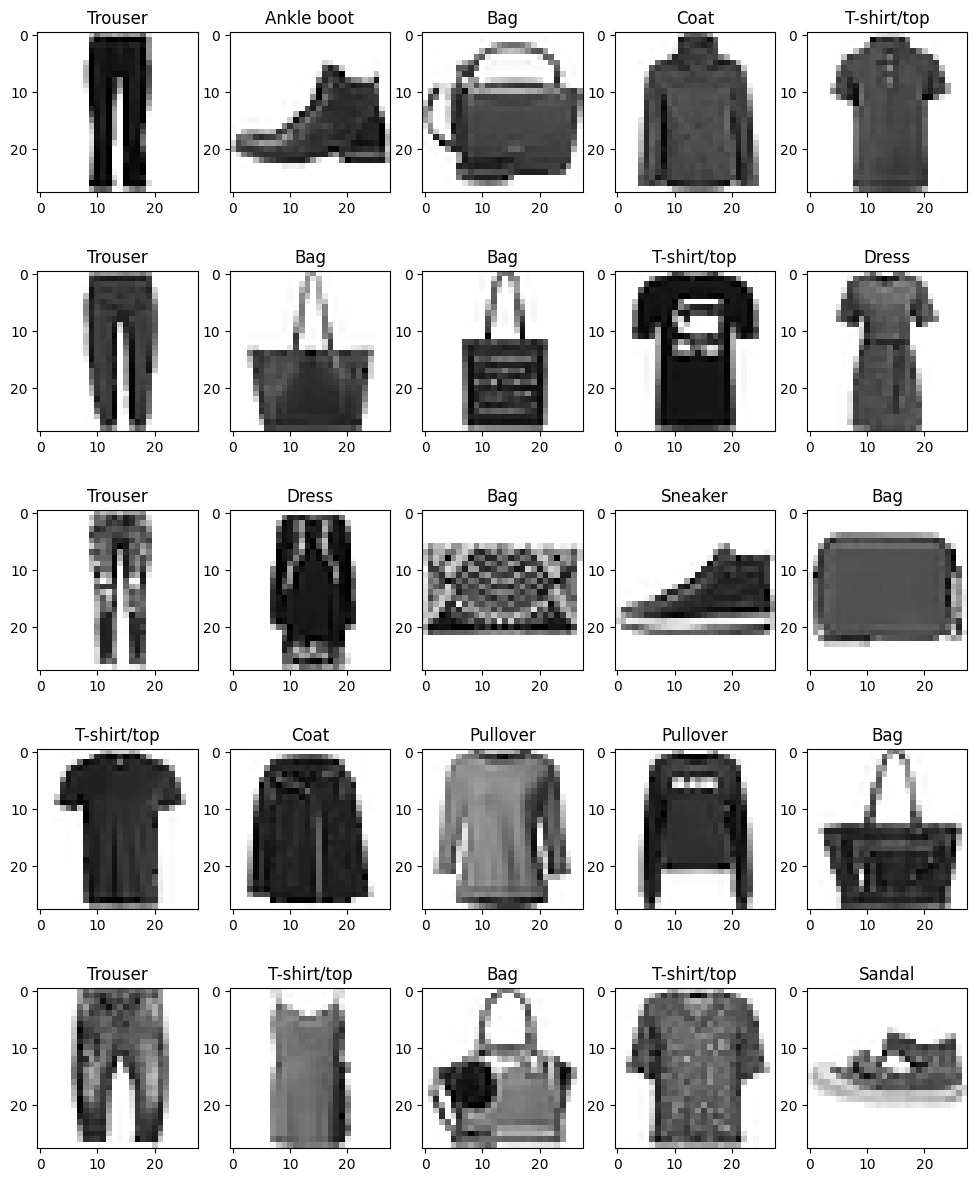

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12, 15))

for i in range(25):
    img_arr = train.sample(1).values.reshape(785)
    label = img_arr[0]
    pixels = img_arr[1:]
    row = i // 5
    column = i % 5
    axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[row, column].set_title(class_names[label])


In [ ]:
(
    train
    .label
    .replace(class_names)
    .value_counts()
)

Pullover       6000
Ankle boot     6000
Shirt          6000
T-shirt/top    6000
Dress          6000
Coat           6000
Sandal         6000
Bag            6000
Sneaker        6000
Trouser        6000
Name: label, dtype: int64

In [ ]:
(
    test
    .label
    .replace(class_names)
    .value_counts()
)

T-shirt/top    1000
Trouser        1000
Pullover       1000
Dress          1000
Bag            1000
Shirt          1000
Sandal         1000
Coat           1000
Sneaker        1000
Ankle boot     1000
Name: label, dtype: int64

# 3. Preparación de los datos

Se plantea un problema de aprendizaje supervisado, por esta razón vamos a separar los DataFrame de prueba y entrenamiento en sus respectivas etiquetas y caracteristicas.

In [ ]:
# X and y from train dataframe
X_train = train.drop('label', axis=1)
y_train = train.label

# X and y from test dataframe
X_test = test.drop('label', axis=1)
y_test = test.label

In [ ]:
print('Tamaño features de train: ', X_train.shape)
print('Tamaño labels de train ', y_train.shape)
print('Tamaño features de test: ', X_test.shape)
print('Tamaño labels de test: ', y_test.shape)

Tamaño features de train:  (60000, 784)
Tamaño labels de train  (60000,)
Tamaño features de test:  (10000, 784)
Tamaño labels de test:  (10000,)


Es recomendable normalizar los valores de píxeles al entrenar algoritmos de clasificación de imágenes. La normalización ayuda a estabilizar el entrenamiento, mejorar la generalización y prevenir el sobreajuste al ajustar los valores de píxeles en un rango específico. Tomamos cada pixel y llevamos su respectivo valor a un rango [0, 1]

In [ ]:
# Normalize data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train))
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test))

Observamos nuestros datos normalizados

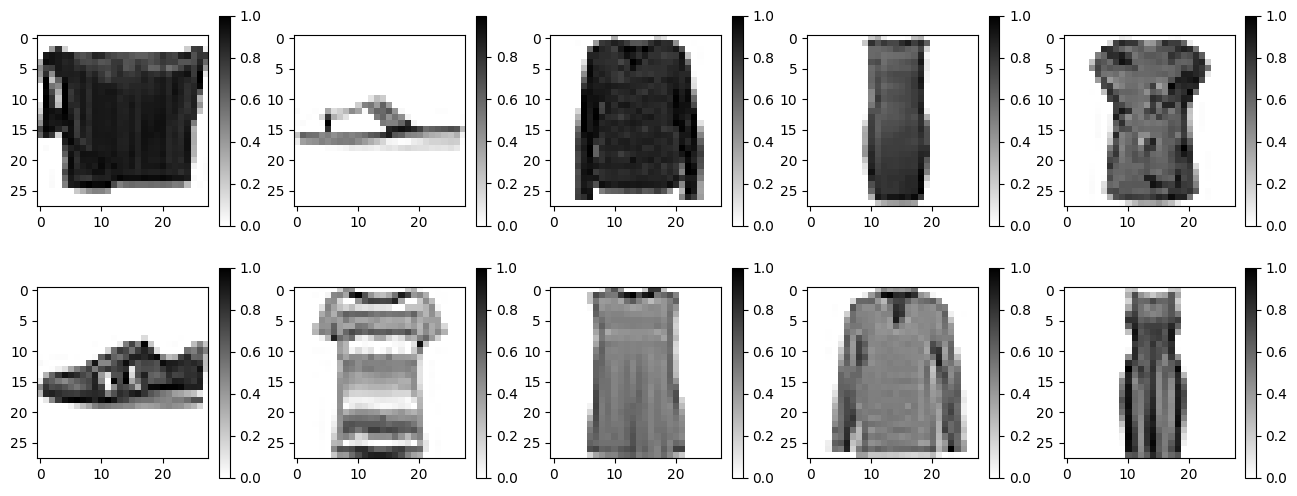

In [ ]:
# Show normalized data
fig, axes = plt.subplots(2, 5, figsize=(16, 6))

for i in range(10):
    pixels = X_train_norm.sample(1).values.reshape(784)

    row = i // 5
    column = i % 5

    im = axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    fig.colorbar(im, ax = axes[row, column])

In [ ]:
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.006098,0.008811,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Por ultimo, se realizará una reducción de la dimensionalidad de los datos por medio de PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_norm)

[Text(0.5, 0, 'Componente'), Text(0, 0.5, 'Varianza Acumulada')]

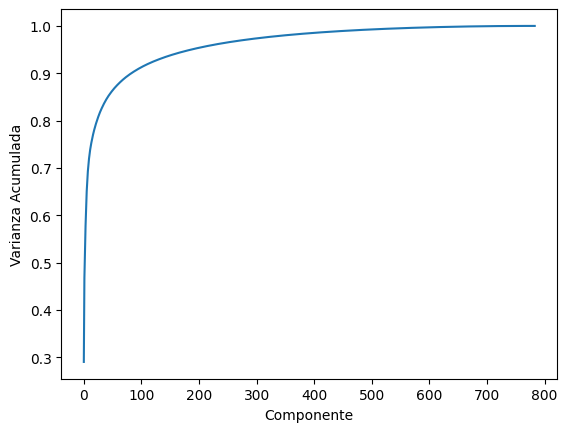

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='Componente', ylabel='Varianza Acumulada')

Se observa que con al rededor de 200 componentes puedo explicar el 95% de mis datos. Obtengamos este resultado de forma precisa:

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = (cumulative_variance < 0.95).sum() + 1
n_components

188

In [ ]:
pca = PCA(n_components=n_components).fit(X_train_norm)

In [ ]:
X_train_t = pca.transform(X_train_norm)
X_train_r = pca.inverse_transform(X_train_t)

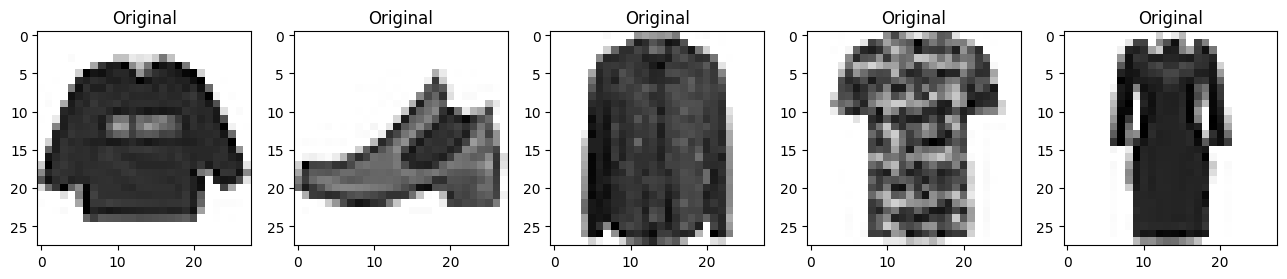

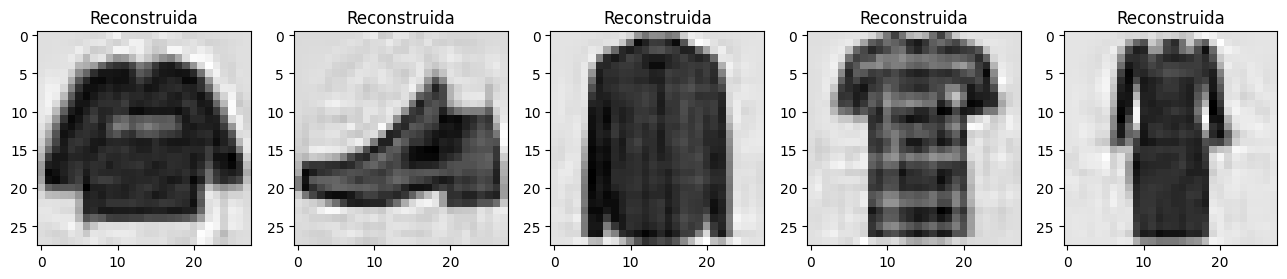

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_norm.values[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Original')

fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_r[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Reconstruida')

# 4. Modelamiento

## 4.1. KNN

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# params = {
#     'n_neighbors': [5, 10, 15, 20],
#     'metric': ['euclidean', 'manhattan']
# }

In [ ]:
# knn = neighbors.KNeighborsClassifier()
# grid_search = GridSearchCV(knn, params, cv=3)
# grid_search.fit(X_train_r, y_train)

Como primera aproximación en la clasificación de los datos se propone entrenar 3 modelos, de la siguiente forma:
- Modelo 1: se usará para el entrenamiento los pixeles originales.
- Modelo 2: se usará para el entrenamiento los pixeles normalizados.
- Modelo 3: se usará en el entrenamiento los pixeles normalizados y reducidos en su dimencionalidad.
Hacer un grid search requiere un costo computaciónal muy elevado. Por esta razon, no se realizara. En cambio, como desde un inicio sabemos que nuestro problema de clasificación se resume en 10 clases, podemos tomar como el parametro de vecinos igual a 10.

In [ ]:

# knn instances
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=n)
knn_2 = neighbors.KNeighborsClassifier(n_neighbors=n)
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=n)

# Models training
knn_1.fit(X_train, y_train)
knn_2.fit(X_train_norm, y_train)
knn_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = knn_1.predict(X_test)
y_pred2 = knn_2.predict(X_test_norm)
y_pred3 = knn_3.predict(X_test_norm)

In [ ]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score del modelo entrenado con pixeles originales: \n\n", report_1)
print("Score del modelo entrenado con pixeles normalizados: \n\n", report_2)
print("Score del modelo entrenado con pixeles reducidos dimencionalmente: \n\n", report_3)

Score del modelo entrenado con pixeles originales: 

               precision    recall  f1-score   support

 T-shirt/top     0.7696    0.8750    0.8189      1000
     Trouser     0.9877    0.9650    0.9762      1000
    Pullover     0.7516    0.8110    0.7802      1000
       Dress     0.9068    0.8850    0.8957      1000
        Coat     0.7942    0.7990    0.7966      1000
      Sandal     0.9938    0.7980    0.8852      1000
       Shirt     0.6741    0.5770    0.6218      1000
     Sneaker     0.8573    0.9490    0.9008      1000
         Bag     0.9754    0.9520    0.9636      1000
  Ankle boot     0.8883    0.9620    0.9237      1000

    accuracy                         0.8573     10000
   macro avg     0.8599    0.8573    0.8563     10000
weighted avg     0.8599    0.8573    0.8563     10000

Score del modelo entrenado con pixeles normalizados: 

               precision    recall  f1-score   support

 T-shirt/top     0.7687    0.8740    0.8180      1000
     Trouser     0.987

Como se observa, los mejores valores se obtiene al usar el conjunto de datos que fue reducido dimencionalmente por medio de PCA.

## Random Forest

Se entrena el algoritmo Random Forest, en el que se combinan los resultados de distintos arboles de decision para tener un resultado mas robusto. Este modelo para los mismos hiperparametros definidos en el arbol de decisición previo. Este proceso se realiza 3 veces para los data sets definidos previamente, con el objetivo de establecer las mejores métricas.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
classifier_image_1 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)
classifier_image_2 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)
classifier_image_3 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)

# Models training
classifier_image_1.fit(X_train, y_train)
classifier_image_2.fit(X_train_norm, y_train)
classifier_image_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = classifier_image_1.predict(X_test)
y_pred2 = classifier_image_2.predict(X_test_norm)
y_pred3 = classifier_image_3.predict(X_test_norm)

In [ ]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score del modelo entrenado con pixeles originales: \n\n", report_1)
print("Score del modelo entrenado con pixeles normalizados: \n\n", report_2)
print("Score del modelo entrenado con pixeles reducidos dimencionalmente: \n\n", report_3)

Score del modelo entrenado con pixeles originales: 

               precision    recall  f1-score   support

 T-shirt/top     0.7871    0.8540    0.8192      1000
     Trouser     0.9897    0.9650    0.9772      1000
    Pullover     0.7739    0.7700    0.7719      1000
       Dress     0.8728    0.9260    0.8986      1000
        Coat     0.7601    0.8490    0.8021      1000
      Sandal     0.9757    0.9230    0.9486      1000
       Shirt     0.7388    0.5460    0.6279      1000
     Sneaker     0.8971    0.9150    0.9059      1000
         Bag     0.9466    0.9740    0.9601      1000
  Ankle boot     0.9080    0.9380    0.9228      1000

    accuracy                         0.8660     10000
   macro avg     0.8650    0.8660    0.8634     10000
weighted avg     0.8650    0.8660    0.8634     10000

Score del modelo entrenado con pixeles normalizados: 

               precision    recall  f1-score   support

 T-shirt/top     0.7924    0.8550    0.8225      1000
     Trouser     0.991

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
classifier_image_1 = MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_3 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )

# Models training
classifier_image_1.fit(X_train, y_train)
classifier_image_2.fit(X_train_norm, y_train)
classifier_image_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = classifier_image_1.predict(X_test)
y_pred2 = classifier_image_2.predict(X_test_norm)
y_pred3 = classifier_image_3.predict(X_test_norm)

In [ ]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score del modelo entrenado con pixeles originales: \n\n", report_1)
print("Score del modelo entrenado con pixeles normalizados: \n\n", report_2)
print("Score del modelo entrenado con pixeles reducidos dimencionalmente: \n\n", report_3)

Score del modelo entrenado con pixeles originales: 

               precision    recall  f1-score   support

 T-shirt/top     0.7713    0.8970    0.8294      1000
     Trouser     0.9591    0.9860    0.9724      1000
    Pullover     0.7649    0.8590    0.8092      1000
       Dress     0.8907    0.8880    0.8893      1000
        Coat     0.8347    0.8180    0.8263      1000
      Sandal     0.9695    0.9530    0.9612      1000
       Shirt     0.8054    0.5710    0.6682      1000
     Sneaker     0.9353    0.9250    0.9301      1000
         Bag     0.9690    0.9680    0.9685      1000
  Ankle boot     0.9339    0.9610    0.9473      1000

    accuracy                         0.8826     10000
   macro avg     0.8834    0.8826    0.8802     10000
weighted avg     0.8834    0.8826    0.8802     10000

Score del modelo entrenado con pixeles normalizados: 

               precision    recall  f1-score   support

 T-shirt/top     0.8600    0.8050    0.8316      1000
     Trouser     0.977

## INDIVIDUAL

In [ ]:
# Los hiperparámetros deben estar en forma de diccionario.
param_grid = {'solver': ['adam'],
              'activation' : ['relu','tanh'],
              'max_iter' : [500,1000],
              'hidden_layer_sizes': [(100,50),(100,100),(150,100)],
              'alpha' : [0.0001,0.001,0.01,0.1],
              'learning_rate' : ['adaptive'],
              'early_stopping' : [True],
              }

param_grid

{'solver': ['adam'],
 'activation': ['relu', 'tanh'],
 'max_iter': [500, 1000],
 'hidden_layer_sizes': [(100, 50), (100, 100), (150, 100)],
 'alpha': [0.0001, 0.001, 0.01, 0.1],
 'learning_rate': ['adaptive'],
 'early_stopping': [True]}

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV

NN_classifier_2 = MLPClassifier(
                    )
grid_clf = GridSearchCV(NN_classifier_2,
                   param_grid=param_grid,
                   return_train_score=True,
                   cv=3
                   )

grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(100, 50), (100, 100),
                                                (150, 100)],
                         'learning_rate': ['adaptive'], 'max_iter': [500, 1000],
                         'solver': ['adam']},
             return_train_score=True)

In [ ]:
# Mejores parámetros identificados.
print(grid_clf.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (150, 100), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


In [ ]:
print(grid_clf.best_score_)

0.8711333333333333


In [ ]:
grid_clf.score(X_test, y_test)

0.8778

In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.07720000000000005
Error de prueba: 0.10829999999999995


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.07286666666666664
Error de prueba: 0.10799999999999998


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.05796666666666672
Error de prueba: 0.10189999999999999


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,100),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.08121666666666671
Error de prueba: 0.1059


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.05883333333333329
Error de prueba: 0.10140000000000005


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.05351666666666666
Error de prueba: 0.09970000000000001


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.056916666666666615
Error de prueba: 0.10219999999999996


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.07901666666666662
Error de prueba: 0.10460000000000003


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,100),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.06220000000000003
Error de prueba: 0.10240000000000005


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,50),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.0001,
                    early_stopping = True,
                    alpha=0.1,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.09763333333333335
Error de prueba: 0.11429999999999996


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,100),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.0001,
                    early_stopping = True,
                    alpha=0.1,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.07621666666666671
Error de prueba: 0.10609999999999997


In [ ]:
classifier_image_2 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,100),
                    # learning_rate='adaptive',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    )
classifier_image_2 = classifier_image_2.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.05084999999999995
Error de prueba: 0.10240000000000005


##  Clusterizacion:


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km = km.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred = km.predict(X_test)
y_pred

array([7, 0, 3, ..., 9, 5, 6], dtype=int32)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
homogeneity_score(y_test, y_pred)

0.5004111253704756

In [ ]:
km.inertia_

123913603375.30884

In [ ]:
# Gracicar la curva de aprendizaje de determinada métrica de agrupamiento.

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [ ]:
def plot_extern_metric(X, y, metric, metric_name):
  scores = []
  for i in range(2,20):
    model = KMeans(n_clusters=i, random_state=32)
    model.fit(X)
    y_pred = model.predict(X)
    scores.append(metric(y, y_pred))

  plot_metric(range(2, 20), scores, metric_name)

In [ ]:
from sklearn.metrics import homogeneity_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

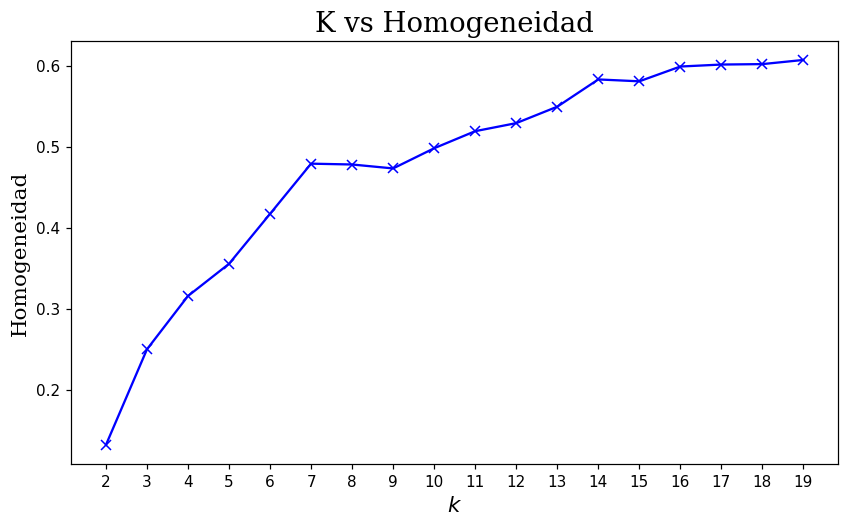

In [ ]:
plot_extern_metric(X_test, y_test, homogeneity_score, 'Homogeneidad')

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

def show_contigency_matrix(X, y, n_clusters, classes):
  # Fijamos la semilla aleatoria para obtener resultados reproducibles.
  model = KMeans(n_clusters, random_state=32)
  model.fit(X)
  y_pred = model.predict(X)
  mat = contingency_matrix(y, y_pred)
  columns = ['Cluster ' + str(i) for i in range(n_clusters)]

  # Se retorna cómo un DataFrame de Pandas para mejorar la visualización.
  return pd.DataFrame(mat, columns=columns, index=classes)

In [ ]:
show_contigency_matrix(X_test, y_test, 10, test.value_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: ignored

# 5. Evaluación

# 6. Exportar el modelo

In [ ]:
# Save model to .pks
from joblib import dump

dump(knn_3, 'knn.pkl')

['knn.pkl']